In [176]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [177]:
warnings.filterwarnings('ignore')

In [178]:
# Reading train test csv files
train = pd.read_csv("C:\\Users\\Anonymous\\Desktop\\marketprophecy-main\\NSE Data\\NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv")
test = pd.read_csv("C:\\Users\\Anonymous\\Desktop\\marketprophecy-main\\NSE Data\\NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv")

# Exploratory data analysis

In [179]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [181]:
train['Date'] = pd.to_datetime(train['Date'])

In [182]:
train.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [183]:
train=train.dropna()              #as only 6 are nan so we drop them instead of imputing them

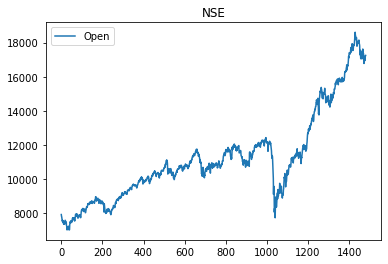

In [184]:
train[['Open']].plot()
plt.title("NSE")
plt.show()

In [185]:
train['Date'][1480]

Timestamp('2021-12-31 00:00:00')

# Model (ARIMA)

Here I am just using and predicting opening value of NSE. (Univariate approach)

This can be repeated six times separately to get values of other six features as well.

In [186]:
train_ar = train['Open'].values
test_ar = test['Open'].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=17276.125271, expected=17387.150391
predicted=17378.675017, expected=17681.400391
predicted=17674.249641, expected=17820.099609
predicted=17834.084864, expected=17768.500000
predicted=17794.997342, expected=17797.599609
predicted=17819.711937, expected=17913.300781
predicted=17911.805468, expected=17997.750000
predicted=17993.858003, expected=18170.400391
predicted=18177.590794, expected=18257.000000
predicted=18273.264335, expected=18185.000000
predicted=18202.060999, expected=18235.650391
predicted=18249.475628, expected=18337.199219
predicted=18338.554102, expected=18129.199219
predicted=18140.088632, expected=17921.000000
predicted=17941.206746, expected=17613.699219
predicted=17629.144638, expected=17575.150391
predicted=17550.765438, expected=17001.550781
predicted=17013.981309, expected=17062.000000
predicted=17029.578180, expected=17208.300781
predicted=17207.990620, expected=17301.050781
predicted=17266.679133, expected=17529.449219
predicted=17565.474047, expected=1

In [187]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1496
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9340.573
Method:                       css-mle   S.D. of innovations            124.555
Date:                Tue, 08 Feb 2022   AIC                          18695.145
Time:                        20:12:41   BIC                          18732.319
Sample:                             1   HQIC                         18708.996
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5504      3.339      1.962      0.050       0.006      13.095
ar.L1.D.y     -0.0374      0.026     -1.447      0.148      -0.088       0.013
ar.L2.D.y      0.0327      0.026      1.266      0.2

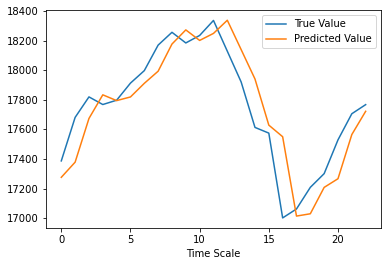

In [188]:
plt.plot(test_ar, label = 'True Value')
plt.plot(predictions, label = 'Predicted Value')
plt.xlabel('Time Scale')
plt.legend()

In [189]:
predictions

[array([17276.12527069]),
 array([17378.67501709]),
 array([17674.24964051]),
 array([17834.08486402]),
 array([17794.99734214]),
 array([17819.7119368]),
 array([17911.80546799]),
 array([17993.85800266]),
 array([18177.59079411]),
 array([18273.26433465]),
 array([18202.06099854]),
 array([18249.47562839]),
 array([18338.55410197]),
 array([18140.08863197]),
 array([17941.20674637]),
 array([17629.14463764]),
 array([17550.76543831]),
 array([17013.98130852]),
 array([17029.57818013]),
 array([17207.99062003]),
 array([17266.67913329]),
 array([17565.47404654]),
 array([17722.60615412])]

In [190]:
mape = np.mean(np.abs(predictions - test_ar)/np.abs(test_ar))  # MAPE

print(mape)


0.024855220131452593


Around 2.48% MAPE implies the model is about 97.52% accurate in predicting the next 15 observations.